**Cargamos las paqueterías para manejar los datos y realizar los gráficos**

In [106]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Iniciamos con la base de datos que contiene la temperatura promedio por estado**

In [108]:
datos = pd.read_csv('SalesTotalbyMonth_withTemperature.csv')
datos

,Unnamed: 0,KeyFecha,Filial,Litros,Venta,Estado,KeyEstado,KeyAM,Temperatura
0,0,2017-01,ALAMO,136123.0,1120651.0,VEZ,29,201701,20.7
1,1,2017-01,ALDAMA,51862.0,440557.0,CHI,7,201701,11.7
2,2,2017-01,ALLENDE,94917.0,776635.0,NL,18,201701,16.8
3,3,2017-01,CALPULALPAN,67137.0,522378.0,TLX,28,201701,12.5
4,4,2017-01,CD. VICTORIA,87200.0,715542.0,TMS,27,201701,20.3
...,...,...,...,...,...,...,...,...,...
1337,1337,2021-12,SAN NICOLAS,448734.0,5671409.0,NL,18,202112,19.0
1338,1338,2021-12,SANTA CATARINA,108538.0,1374997.0,NL,18,202112,19.0
1339,1339,2021-12,SOTO LA MARINA,25809.0,324083.0,TMS,27,202112,22.2
1340,1340,2021-12,TAMPICO,212424.0,2726534.0,TMS,27,202112,22.2


**Importamos los métodos de Machine Learning para regresión: Multi-layer Perceptron (MLP) y Árboles de decisión (DTR). Elegimos MLP debido a que Las redes neuronales son buenas aprendiendo patrones complejos, y los comparamos con los DTR.**

In [109]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

**Determinamos que la mejor forma de entrenar al modelo es considerando agrupaciones por filial ya que es donde se observa mejor la correlación entre temperatura y ventas.**

**Elegimos la filial ALAMO**

In [110]:
datos_alamo = datos[datos["Filial"] == "ALAMO"]


**Seleccionamos los datos de Temperatura y Litros para predecir la Venta. Determinamos que los hiperparámetros de la red: número de capas interna=6, iteraciones=100000, función de activación=relu, fueron adecuadas para realizar la regresión. En comparación con los árboles, la red tiene un mejor puntaje (0.75 vs 0.67).**


In [111]:
X = np.array(datos_alamo[["Temperatura","Litros"]]).reshape(60,2)
y=datos_alamo["Venta"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=72)

regBDT = DecisionTreeRegressor(max_depth=8)
regBDT.fit(X_train, y_train)
regr = MLPRegressor(hidden_layer_sizes=(8,),random_state=72, max_iter=10000,activation="relu").fit(X_train, y_train)
regr.predict(X_test)
regBDT.predict(X_test)
regr.score(X_test, y_test), regBDT.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(0.7542128362118511, 0.7449941256322046)

**Con la red neuronal entrenada, predecimos las ventas de la filial ALDAMA, considerando la Temperatura y los Litros como variables de entrada. El resultado fue graficado como serie de tiempo.**

In [112]:

datos_aldama = datos[datos["Filial"] == "ALDAMA"]
Xal = np.array(datos_aldama[["Temperatura","Litros"]]).reshape(60,2)

Xventasrealaldama = np.array(datos_aldama[["Venta"]])

Xpred1=regr.predict(Xal)
Xpred1 = Xpred1.reshape(60,1)

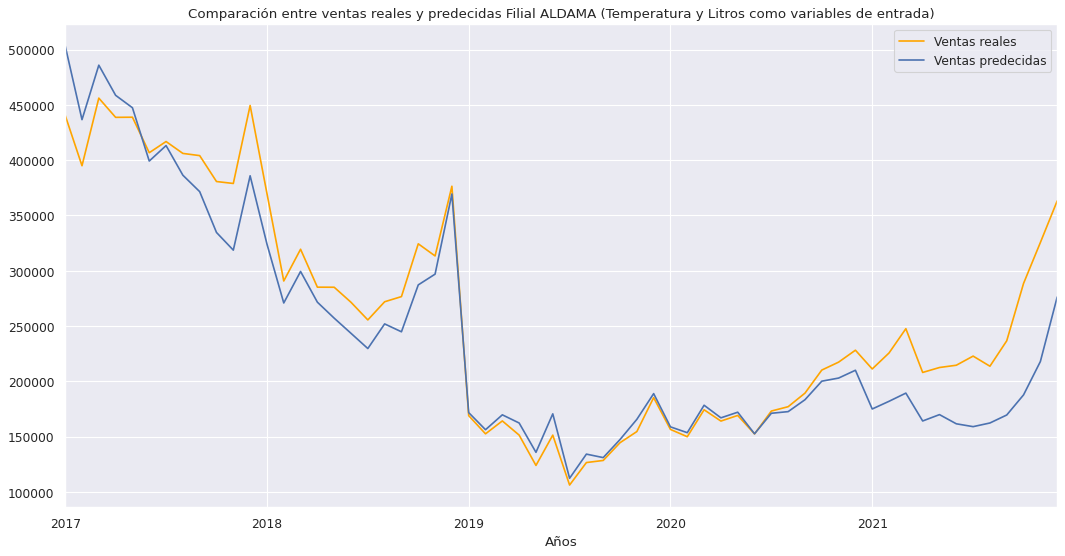

In [113]:
Fechas = np.array(datos_alamo[["KeyFecha"]])
conreal = np.concatenate((Fechas, Xventasrealaldama),axis=1)
condataframereal = pd.DataFrame(conreal, columns = ['Fecha','VentasAldama'])
condataframereal['Fecha'] = pd.to_datetime(condataframereal['Fecha'].astype(str))
condataframereal['VentasAldama'] = condataframereal['VentasAldama'].astype(float)
condataframereal = condataframereal.set_index("Fecha")

conpred = np.concatenate((Fechas, Xpred1),axis=1)
condataframepred = pd.DataFrame(conpred, columns = ['Fecha','VentasAldamaPred'])
condataframepred['Fecha'] = pd.to_datetime(condataframepred['Fecha'].astype(str))
condataframepred['VentasAldamaPred'] = condataframepred['VentasAldamaPred'].astype(float)
condataframepred = condataframepred.set_index("Fecha")
plt.figure(figsize=(16, 8), dpi=80)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
condataframereal['VentasAldama'].plot(label='Ventas reales', color='orange')
condataframepred['VentasAldamaPred'].plot(label='Ventas predecidas')
  
# adding title to the plot
plt.title('Comparación entre ventas reales y predecidas Filial ALDAMA (Temperatura y Litros como variables de entrada)')
  
# adding Label to the x-axis
plt.xlabel('Años')
  
# adding legend to the curve
plt.legend()

**Ahora consideramos la correlación entre la precipitación acumulada mensual (mm) y la Venta e importamos los datos.**

In [114]:
datoslluvia = pd.read_csv('SalesTotalbyMonth_withTemperature_Rain.csv')
datoslluvia

,Unnamed: 0,KeyFecha,Filial,Litros,Venta,Estado,KeyEstado,KeyAM,Temperatura,Lluvia
0,0,2017-01,ALAMO,136123.0,1120651.0,VEZ,29,201701,20.7,36.9
1,1,2017-01,ALDAMA,51862.0,440557.0,CHI,7,201701,11.7,12.3
2,2,2017-01,ALLENDE,94917.0,776635.0,NL,18,201701,16.8,10.2
3,3,2017-01,CALPULALPAN,67137.0,522378.0,TLX,28,201701,12.5,0.4
4,4,2017-01,CD. VICTORIA,87200.0,715542.0,TMS,27,201701,20.3,8.3
...,...,...,...,...,...,...,...,...,...,...
1337,1337,2021-12,SAN NICOLAS,448734.0,5671409.0,NL,18,202112,19.0,12.0
1338,1338,2021-12,SANTA CATARINA,108538.0,1374997.0,NL,18,202112,19.0,12.0
1339,1339,2021-12,SOTO LA MARINA,25809.0,324083.0,TMS,27,202112,22.2,12.6
1340,1340,2021-12,TAMPICO,212424.0,2726534.0,TMS,27,202112,22.2,12.6


**Agrupamos nuevamente por Filial ALAMO para entrenar a la red.**

In [115]:
datos_alamolluvia = datoslluvia[datoslluvia["Filial"] == "ALAMO"]
datos_alamolluvia

,Unnamed: 0,KeyFecha,Filial,Litros,Venta,Estado,KeyEstado,KeyAM,Temperatura,Lluvia
0,0,2017-01,ALAMO,136123.0,1120651.0,VEZ,29,201701,20.7,36.9
24,24,2017-02,ALAMO,115749.0,986664.0,VEZ,29,201702,22.0,32.6
48,48,2017-03,ALAMO,131159.0,1110760.0,VEZ,29,201703,22.4,35.3
72,72,2017-04,ALAMO,134110.0,1100753.0,VEZ,29,201704,24.6,65.4
96,96,2017-05,ALAMO,118705.0,974466.0,VEZ,29,201705,26.1,110.0
120,120,2017-06,ALAMO,106815.0,876518.0,VEZ,29,201706,25.8,181.7
143,143,2017-07,ALAMO,113229.0,902288.0,VEZ,29,201707,24.5,245.1
166,166,2017-08,ALAMO,101180.0,855318.0,VEZ,29,201708,25.5,199.7
189,189,2017-09,ALAMO,103747.0,916295.0,VEZ,29,201709,24.4,429.0
212,212,2017-10,ALAMO,114147.0,1133779.0,VEZ,29,201710,22.8,314.9


**Al entrenar con las variables Litros y Lluvia, encontramos un mejor puntaje en la prueba (0.83 vs 0.75),en comparación al entrenar con la Temperatura y Litros. 
Esto es consistente, pues la precipitación se correlaciona mejor con la venta.**

In [116]:
Xl = np.array(datos_alamolluvia[["Litros","Lluvia"]]).reshape(60,2)
yl=datos_alamolluvia["Venta"]
X_trainl, X_testl, y_trainl, y_testl = train_test_split(Xl, yl, test_size=0.1,random_state=72)
regrlluvia = MLPRegressor(hidden_layer_sizes=(10,),random_state=72, max_iter=10000,activation="relu").fit(X_trainl, y_trainl)
regrlluvia.predict(X_testl)
regrlluvia.score(X_testl, y_testl)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.836296324324385

**Nuevamente con la red entrenada, predecimos la venta considerando la precipitación y los Litros de la Filial ALDAMA.**

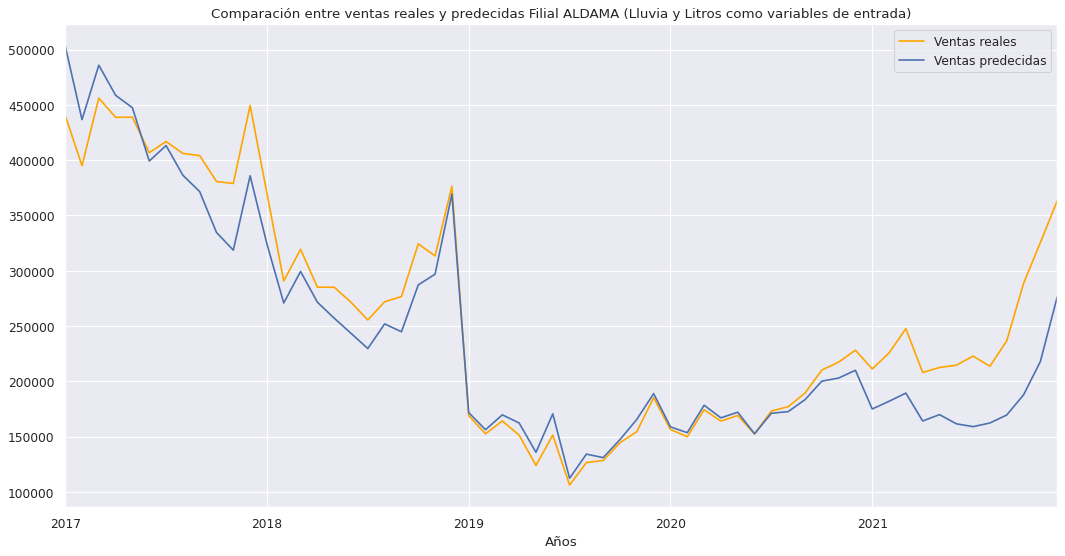

In [117]:
datos_aldamalluvia = datoslluvia[datoslluvia["Filial"] == "ALDAMA"]

Xal2 = np.array(datos_aldamalluvia[["Lluvia","Litros"]]).reshape(60,2)
Xventasrealaldama2 = np.array(datos_aldamalluvia[["Venta"]])

Xpred2=regrlluvia.predict(Xal2)
Xpred2 = Xpred2.reshape(60,1)

Fechas = np.array(datos_alamo[["KeyFecha"]])
conreal = np.concatenate((Fechas, Xventasrealaldama2),axis=1)
condataframereal = pd.DataFrame(conreal, columns = ['Fecha','VentasAldama'])
condataframereal['Fecha'] = pd.to_datetime(condataframereal['Fecha'].astype(str))
condataframereal['VentasAldama'] = condataframereal['VentasAldama'].astype(float)
condataframereal = condataframereal.set_index("Fecha")

conpred = np.concatenate((Fechas, Xpred1),axis=1)
condataframepred = pd.DataFrame(conpred, columns = ['Fecha','VentasAldamaPred'])
condataframepred['Fecha'] = pd.to_datetime(condataframepred['Fecha'].astype(str))
condataframepred['VentasAldamaPred'] = condataframepred['VentasAldamaPred'].astype(float)
condataframepred = condataframepred.set_index("Fecha")

plt.figure(figsize=(16, 8), dpi=80)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
condataframereal['VentasAldama'].plot(label='Ventas reales', color='orange')
condataframepred['VentasAldamaPred'].plot(label='Ventas predecidas')
  
# adding title to the plot
plt.title('Comparación entre ventas reales y predecidas Filial ALDAMA (Lluvia y Litros como variables de entrada)')
  
# adding Label to the x-axis
plt.xlabel('Años')
  
# adding legend to the curve
plt.legend()



**Finalmente consideramos la correlación entre el Índice Nacional de Precios al Consumidor (INCP) con la venta. Esta base de datos se encuentra agrupada por mes**

In [118]:
datosincp = pd.read_csv('INCP_MENSUAL.csv')
datosincp

,Temperatura,mes,year,Litros,PrecioGas,Venta,INCP,Close_USCI,dollar,Lluvia
0,20.7,1,2017,8395286.0,2.639668e+06,54709601.0,93.258668,40.270000,21.209999,36.9
1,16.9,1,2018,7596855.0,3.980515e+06,59469531.0,99.881308,40.660000,20.354162,32.6
2,18.9,1,2019,2544190.0,3.548810e+06,23837139.0,106.131563,39.160000,18.744143,35.3
3,19.4,1,2020,2532046.0,3.200172e+06,22069862.0,108.335004,38.360001,18.996960,65.4
4,19.0,1,2021,2540236.0,4.509944e+06,27360021.0,111.177193,38.250000,18.669201,110.0
5,22.0,2,2017,6904522.0,2.390469e+06,47178017.0,93.809485,38.490002,18.111200,181.7
6,21.3,2,2018,6463407.0,3.153612e+06,48244723.0,101.135588,39.330002,17.908310,245.1
7,21.9,2,2019,2213669.0,3.029554e+06,20472979.0,106.932459,40.930000,17.808300,199.7
8,20.0,2,2020,2514701.0,3.004212e+06,21064441.0,108.017600,40.040001,18.129080,429.0
9,19.9,2,2021,2600513.0,4.721552e+06,29107998.0,113.962000,41.360001,19.189600,314.9


**Entrenamos a la red con el INCP y Litros. El puntaje no es muy bueno (lejano a 1), debido a que la correlación entre el INCP y las ventas es baja.**

In [119]:
Xincp = np.array(datosincp[["INCP","Litros"]]).reshape(60,2)
yincp = datosincp["Venta"]

X_trainin, X_testin, y_trainin, y_testin = train_test_split(Xincp, yincp, test_size=0.1,random_state=72)
regrincp = MLPRegressor(hidden_layer_sizes=(10,),random_state=72, max_iter=100000,activation="relu").fit(X_trainin, y_trainin)
regrincp.score(X_testin, y_testin)


0.0020984689259464506

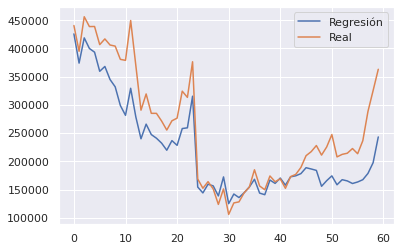

In [120]:
Xpred3=regrincp.predict(Xal)
plt.plot(Xpred3,label="Regresión")
plt.plot(Xventasrealaldama,label="Real")
plt.legend()
plt.show()

In [121]:
!jupyter nbconvert --to html '/content/drive/MyDrive/DATATHON_DSC/modelodeprediccion.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/DATATHON_DSC/modelodeprediccion.ipynb to html
[NbConvertApp] Writing 588778 bytes to /content/drive/MyDrive/DATATHON_DSC/modelodeprediccion.html


In [124]:
!ls '/content/drive/MyDrive/DATATHON_DSC/'

 2017
 2018
 2019
 2020
 2021
 2022
 Analisis_Variables_Mensual.html
 Analisis_Variables_Mensual.ipynb
 Analisis_Variables_Semanal.html
 Analisis_Variables_Semanal.ipynb
'Copia de ezCopia de Ventas_totales_general.ipynb'
'Copy of Analisis_Variables_Mensual.ipynb'
'Copy of Analisis_Variables_Semanal.ipynb'
'Copy of DATATHON2_MOD.ipynb'
 Correlaciones_elchido.html
 Correlaciones_filial_mensual.html
 Correlaciones_filial_mensual.ipynb
 Correlaciones.ipynb
 DATA_FULL
 DATATHON.ipynb
'David Analisis_Variables_Mensual.ipynb'
'Dependencia Litros Temperatura.ipynb'
'ErikCopia de DATATHON2_MOD.ipynb'
'Graficas Chidas.html'
 Group_byfilial
 Lluvia
 modelodeprediccion.html
 modelodeprediccion.ipynb
 MODELOPREDICCIONPERRAKON.ipynb
 MODELOPREDICCIONPLOTSLALO.ipynb
 Sales_Total
 SalesTotalbyMonth_withTemperature_Rain.html
 SalesTotalbyMonth_withTemperature_Rain.ipynb
 SalesTotal.html
 SalesTotal.ipynb
 Temperatura
 Variables_Mensuales
 Variables_Semanales
